In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def f_yt(y, t):
    return -y*np.log(y)/t

In [3]:
def orig(t):
    return np.exp(1/t)

In [4]:
def RQ(t):
    f_rq = [y0]
    
    k1 = f_yt(y0, t0)
    k2 = f_yt(y0 + h/2, t0 + (h/2)*k1)
    k3 = f_yt(y0 + h/2, t0 + (h/2)*k2)
    k4 = f_yt(y0 + h, t0 + h*k3)
    
    f_rq.append(f_rq[0] + (h/6) * (k1 + 2*k2 + 2*k3 + k4))
    
    for i in range(2, len(t)):
        k1 = f_yt(f_rq[i - 1], f_rq[i - 1])
        k2 = f_yt(f_rq[i - 1] + h/2, t[i - 1] + (h/2)*k1)
        k3 = f_yt(f_rq[i - 1] + h/2, t[i - 1] + (h/2)*k2)
        k4 = f_yt(f_rq[i - 1] + h, t[i - 1] + h*k3)
        f_rq.append(f_rq[i - 1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4))
    
    return f_rq

In [5]:
y0 = np.exp(1)
t0 = 1

t = np.linspace(t0, 5, 100)
h = (t[-1] - t[0])/len(t)

y = odeint(f_yt, y0, t)

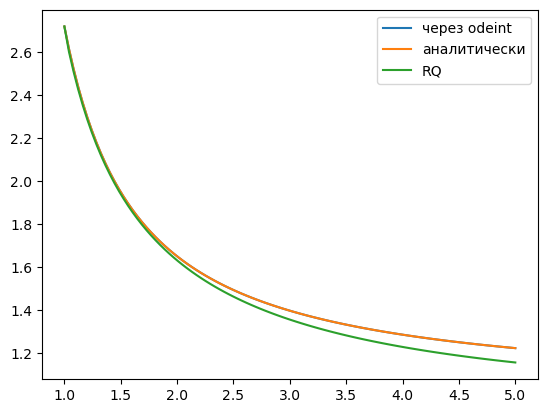

In [6]:
plt.plot(t, y, label='через odeint')
plt.plot(t, orig(t), label='аналитически')   
plt.plot(t, RQ(t), label='RQ')
plt.legend()